In [18]:
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [20]:
df.shape

(5572, 5)

#Data Cleaning
#EDA
#Text Processing
#Model Building
#Improvement
#website
#Deploy

1.Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
df.drop(columns=["Unnamed: 2",	"Unnamed: 3","Unnamed: 4"],inplace=True)

In [23]:
df.sample(10)

,v1,v2
108,ham,I know! Grumpy old people. My mom was like you...
878,spam,U have a secret admirer who is looking 2 make ...
152,ham,Ok... Ur typical reply...
5257,ham,"As usual..iam fine, happy &amp; doing well..:)"
2001,ham,Idea will soon get converted to live:)
5470,ham,I thought slide is enough.
537,ham,Or maybe my fat fingers just press all these b...
3531,ham,"Actually, my mobile is full of msg. And i m do..."
569,ham,WOT U WANNA DO THEN MISSY?
3406,ham,Beautiful Truth against Gravity.. Read careful...


In [24]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [25]:
df.sample(5)

,target,text
3630,ham,Thank you princess! You are so sexy...
5377,spam,The current leading bid is 151. To pause this ...
4288,ham,"Okay, good, no problem, and thanx!"
3613,ham,Ok c Ì_ then.
2345,ham,"Hi this is yijue, can i meet u at 11 tmr?"


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
df["target"]=encoder.fit_transform(df["target"])

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
df.duplicated().sum()


403

In [31]:
df.drop_duplicates(keep="first",inplace=True)

In [32]:
#2.EDA

In [33]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [35]:
!pip install matplotlib

     ---------------------------------------- 7.7/7.7 MB 932.3 kB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 1.1 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 1.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
     -------------------------------------- 103.2/103.2 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


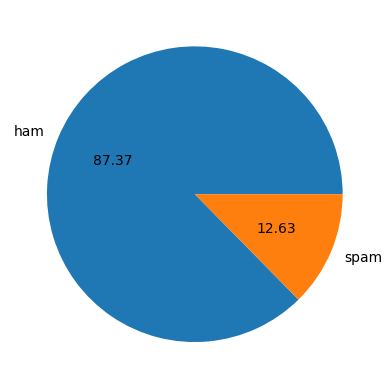

In [36]:
import matplotlib.pyplot as plt
plt .pie(df["target"].value_counts(),labels=['ham',"spam"],autopct="%0.2f")
plt.show()

In [37]:
#Data Imbalenced 

In [38]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df["num_char"]=df["text"].apply(len)

In [42]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df[["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
df[df["target"]==1][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [47]:
df[df["target"]==0][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import seaborn as sns

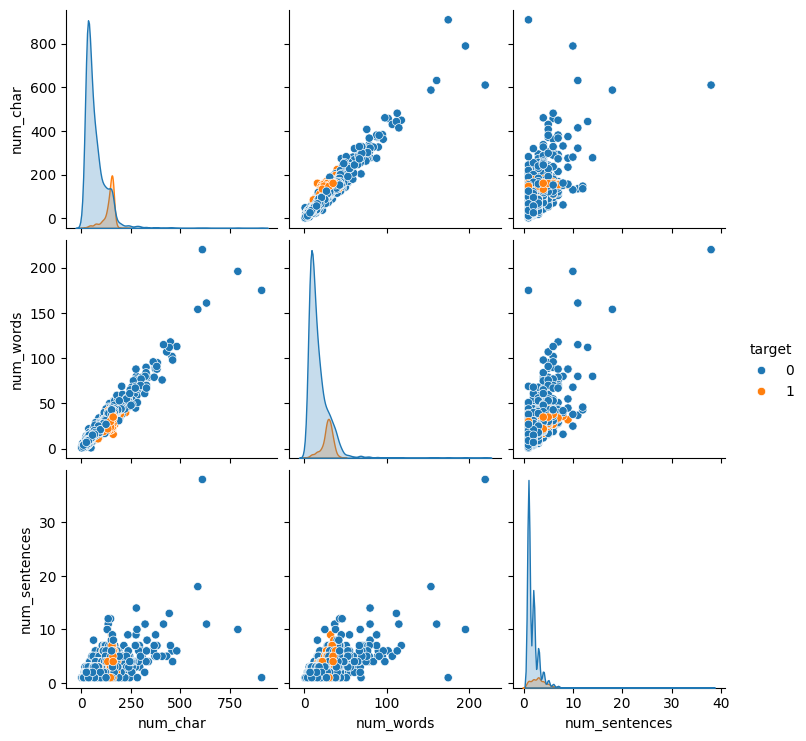

In [51]:
sns.pairplot(df,hue='target')

<Axes: >

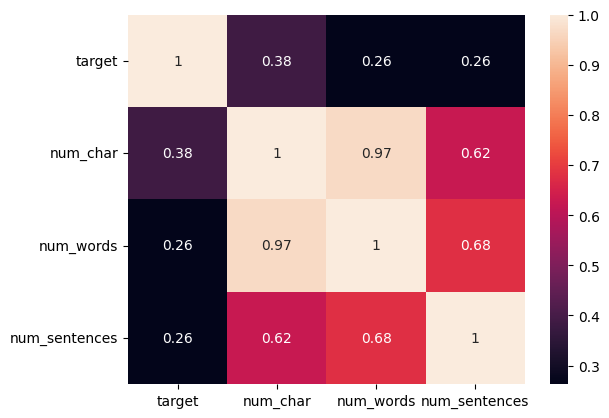

In [52]:
df1=df.select_dtypes(include=["number"])
sns.heatmap(df1.corr(),annot=True)

#3. Data Preprocessing
#lower case
#Tokenization
#Removeing Special characters
#Removeing Stop Words and punctuation
#Stemmming

In [53]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Downloading package punkt to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df['transformed_text'] = df['text'].apply(transform_text)

In [55]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
!pip install wordcloud

     ------------------------------------ 300.2/300.2 kB 394.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [58]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

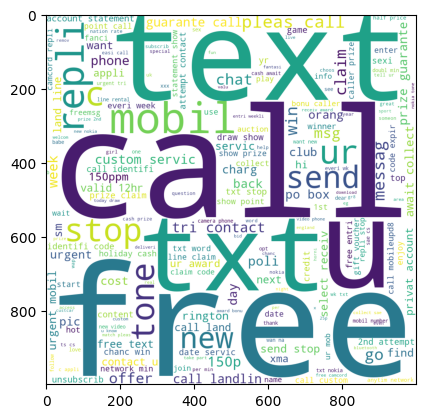

In [59]:
plt.imshow(spam_wc)

In [60]:
hum_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

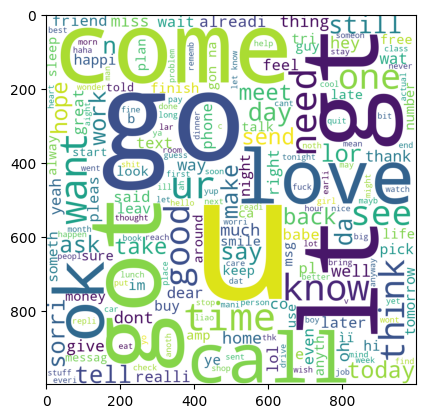

In [61]:
plt.imshow(hum_wc)

In [62]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

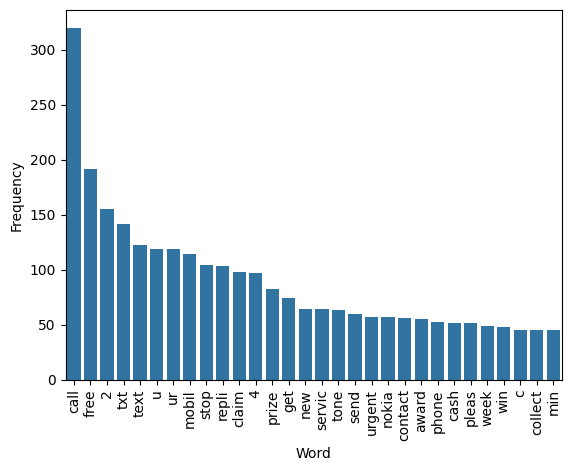

In [64]:
from collections import Counter
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(data=most_common_words_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

35404

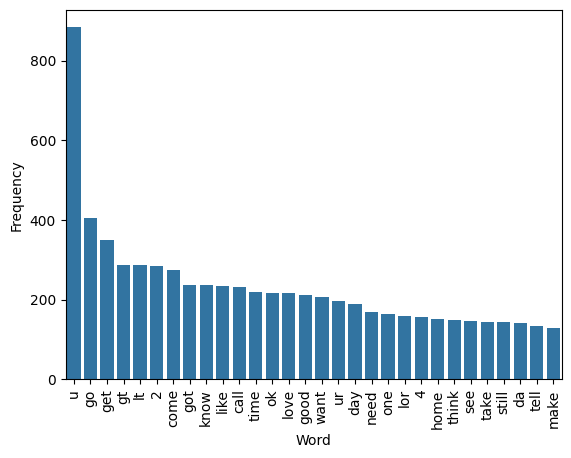

In [67]:
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(data=most_common_words_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [68]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#model buliding

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
X.shape

(5169, 3000)

In [72]:
y=df["target"].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\Debasish Das\Documents\all language\Ml Projects\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

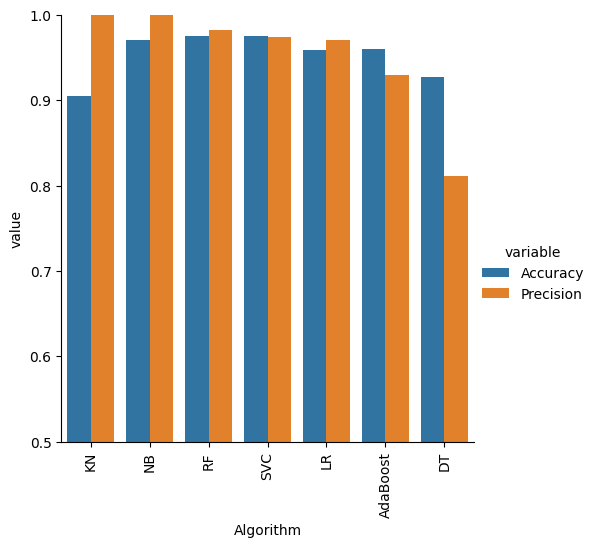

In [87]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [90]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [91]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [94]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

c:\Users\Debasish Das\Documents\all language\Ml Projects\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy 0.960348162475822
Precision 0.9292035398230089


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))